In [1]:
import json
import pandas as pd

# Load JSON file
with open("preprocessed_legal_advice.json", "r", encoding="utf-8") as file:
    data = json.load(file)

# Define labeling function
def classify_legal_issue(text):
    text = text.lower()  # Normalize text
    
    # Criminal Cases
    if any(keyword in text for keyword in ["murder", "theft", "assault", "harassment", "abuse", "threat", "police", "crime"]):
        return "Criminal"
    
    # Labour Law
    if any(keyword in text for keyword in ["salary", "employment", "fnf", "workplace", "job", "hr", "labour", "company"]):
        return "Labour"
    
    # Family Law
    if any(keyword in text for keyword in ["marriage", "divorce", "inheritance", "child", "spouse", "family", "parent"]):
        return "Family"
    
    # Civil Law
    if any(keyword in text for keyword in ["property", "contract", "agreement", "registry", "land", "ownership"]):
        return "Civil"
    
    return "Other"

# Convert data to DataFrame
df = pd.DataFrame(data)

# Label each entry
df["category"] = df["selftext"].apply(classify_legal_issue)

# Save the labeled dataset
df.to_json("labeled_legal_advice.json", orient="records", indent=4)

# Display the first few rows
print(df.head())


                                               title            author  \
0  legally keep father away workplace life please...            divc99   
1  person get married secured residential plot di...           notms16   
2                 fnf paid startup even legal notice      shadowslay97   
3  property ownership joint owner right mother da...  Glum_Success8717   
4                    account fund put hold need help          scshiv29   

    created_date  score  num_comments  \
0  1738059849000      2             1   
1  1738059048000      1             1   
2  1738058763000      3             2   
3  1738058695000      2             0   
4  1738058245000      1             1   

                                            selftext  \
0  father alcoholic controlling he single parent ...   
1  person get married secured residential plot di...   
2  worked early stage startup year less employee ...   
3  note query related asking behalf someone else ...   
4  money account put hold ye

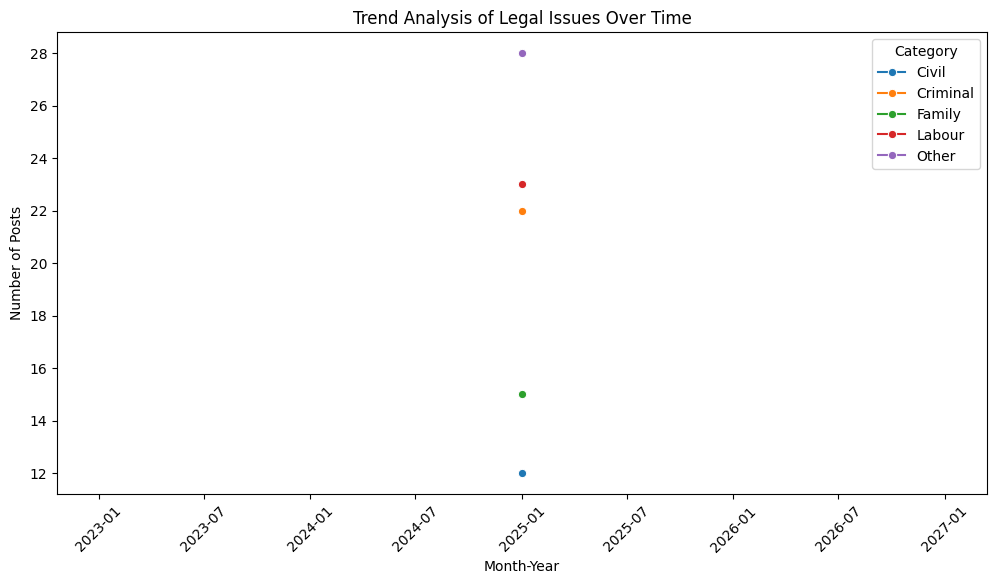

Not enough data for trend forecasting. Need at least 2 time points.


C:\Users\Komal\AppData\Local\Temp\ipykernel_3808\2584604406.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_counts.head(10), x="Location", y="Count", palette="coolwarm")


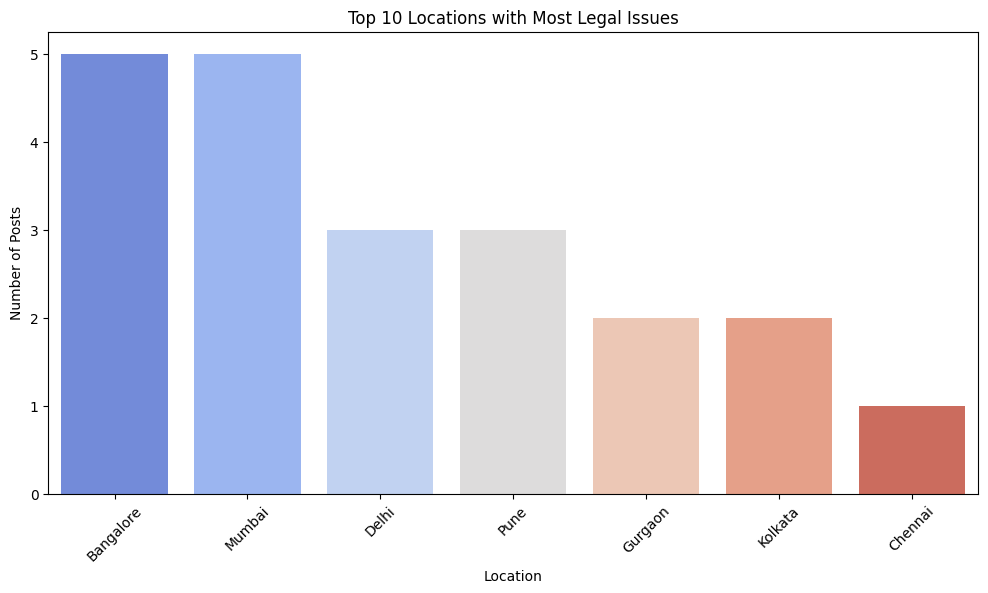

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

df["created_date"] = pd.to_datetime(df["created_date"], unit="ms")

# Extract Year and Month for Trend Analysis
df["year_month"] = df["created_date"].dt.to_period("M")

### ---- TREND ANALYSIS ---- ###

# Group by month-year and count occurrences
trend_data = df.groupby(["year_month", "category"]).size().reset_index(name="count")

# Convert year_month to datetime
trend_data["year_month"] = trend_data["year_month"].astype(str)
trend_data["year_month"] = pd.to_datetime(trend_data["year_month"])

# Plot trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_data, x="year_month", y="count", hue="category", marker="o")
plt.xticks(rotation=45)
plt.xlabel("Month-Year")
plt.ylabel("Number of Posts")
plt.title("Trend Analysis of Legal Issues Over Time")
plt.legend(title="Category")
plt.show()

# Prepare data for Prophet
prophet_df = trend_data.groupby("year_month").sum().reset_index()
prophet_df.rename(columns={"year_month": "ds", "count": "y"}, inplace=True)

# ✅ FIX: Ensure at least 2 data points exist
if len(prophet_df) >= 2:
    # Forecast with Prophet
    model = Prophet()
    model.fit(prophet_df)
    future = model.make_future_dataframe(periods=6, freq="M")  # Predict next 6 months
    forecast = model.predict(future)

    # Plot Forecast
    model.plot(forecast)
    plt.title("Legal Issues Trend Forecast")
    plt.show()
else:
    print("Not enough data for trend forecasting. Need at least 2 time points.")

### ---- LOCATION ANALYSIS ---- ###

# Drop null locations
df_location = df.dropna(subset=["location"])

# Count legal cases per location
location_counts = df_location["location"].value_counts().reset_index()
location_counts.columns = ["Location", "Count"]

# Plot Top Locations
plt.figure(figsize=(12, 6))
sns.barplot(data=location_counts.head(10), x="Location", y="Count", palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("Number of Posts")
plt.title("Top 10 Locations with Most Legal Issues")
plt.show()

In [4]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/13.3 MB 10.6 MB/s eta 0:00:02
   - -------------------------------------- 0.5/13.3 MB 7.6 MB/s eta 0:00:02
   - -------------------------------------- 0.5/13.3 MB 5.6 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/13.3 MB 4.4 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/13.3 MB 4.4 MB/s eta 0:00:03
   -- ------------------------------------- 0.9/13.3 MB 3.5 MB/s eta 0:00:04
   --- ------------------------------------ 1.2/13.3 MB 3.6 MB/s eta 0:00:04
   --- ------------------------------------ 1.3/13.3 MB 3.4 MB/s eta 0:00:04
   ---- ----------------------------------- 1.4/13.3 MB 3.2 MB/s eta 0:00:04
   ---- ----------------------------------- 1.5/13.3 MB 3.1 MB/s eta 0:00:04
   ---- ----------------------------------- 1.6/13.3 MB 3.1 MB/s eta 0:00:04
   ----- -------


[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
